# First, import the packages and the programs from the .py file

In [2]:
import io
import os
import cv2
import boto3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import vision
import json
from PIL import Image, ImageDraw
from textractor import Textractor
from textractor.visualizers.entitylist import EntityList
from textractor.data.constants import TextractFeatures, Direction, DirectionalFinderType
import Process_Programs as pp


This next part details AWS setup.

If you want to proceed with using the root user, I can provide the instructions with that understanding. Please proceed with caution and be aware of the potential security implications:

1. **Create an AWS Account:**
   If you haven't already, sign up for an AWS account through the AWS website (https://aws.amazon.com/).

2. **Install the AWS CLI:**
   Install the AWS Command Line Interface (CLI) on your local machine. You can download and install it from here: https://aws.amazon.com/cli/.

To establish your AWS access key and secret key, you can follow these steps:

Log in to the AWS Management Console:
Go to the AWS Management Console at https://aws.amazon.com/ and sign in using your AWS account credentials.
Access the IAM Console:
Once you're logged in, open the AWS Identity and Access Management (IAM) console. You can do this by clicking on the "Services" dropdown in the top left corner and selecting "IAM" under the "Security, Identity, & Compliance" section.

Proceeding with the root user format, on the right side, click "My security credentials", then create an access key.

3. **Configure AWS CLI with Root User Credentials:**
   Run the following command to configure the AWS CLI with your root user credentials. Replace `YOUR_ACCESS_KEY` and `YOUR_SECRET_KEY` with your actual AWS root user access key and secret key:

   ```bash
   aws configure
   AWS Access Key ID [None]: YOUR_ACCESS_KEY
   AWS Secret Access Key [None]: YOUR_SECRET_KEY
   Default region name [None]: YOUR_REGION
   Default output format [None]: json
   ```
    For the region, there is a dropdown in the top right with different regions. I used us-east-2, since I am in Illinois.

   This configuration will use your root user credentials for AWS CLI commands.

Please proceed with caution and ensure that you understand the security implications of using the root user for AWS tasks. It's recommended to follow best practices by using IAM users or roles for improved security and accountability.

Define the folders you will be working in

In [3]:
input_folder = "images/"

output_folder = "output/"

# Single image processing

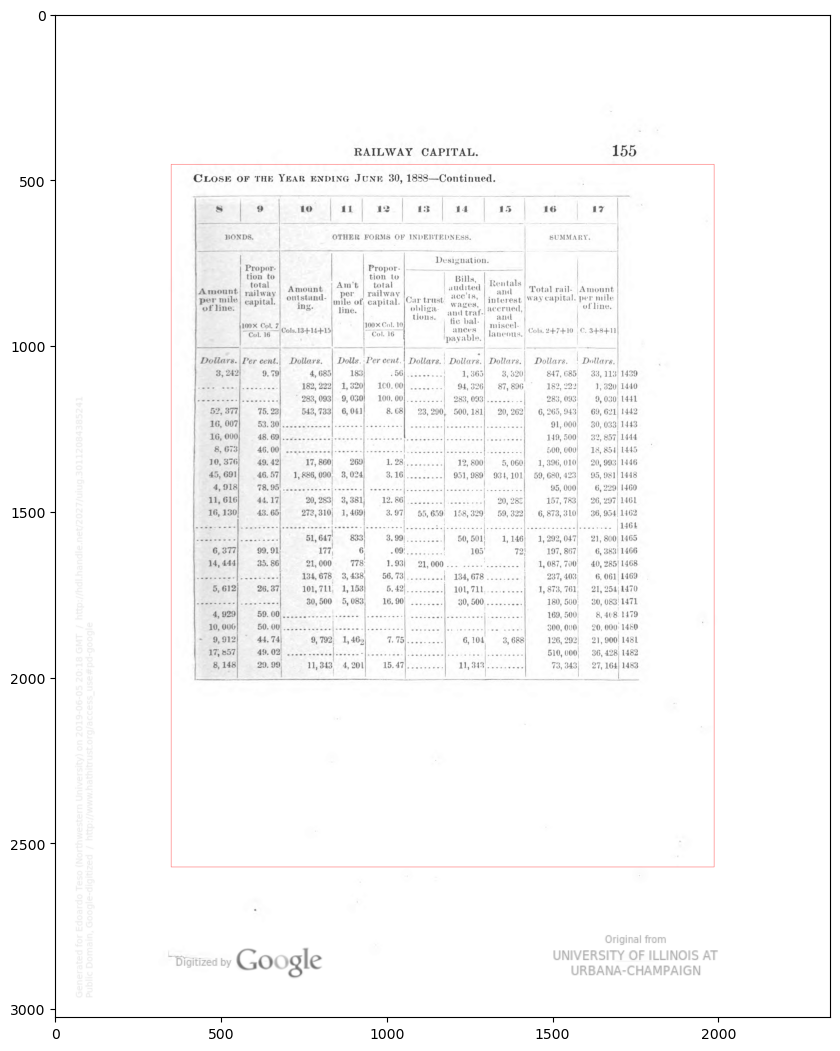

Are you satisfied with the outline you see? (y/n): y
Here is an output based on these parameters


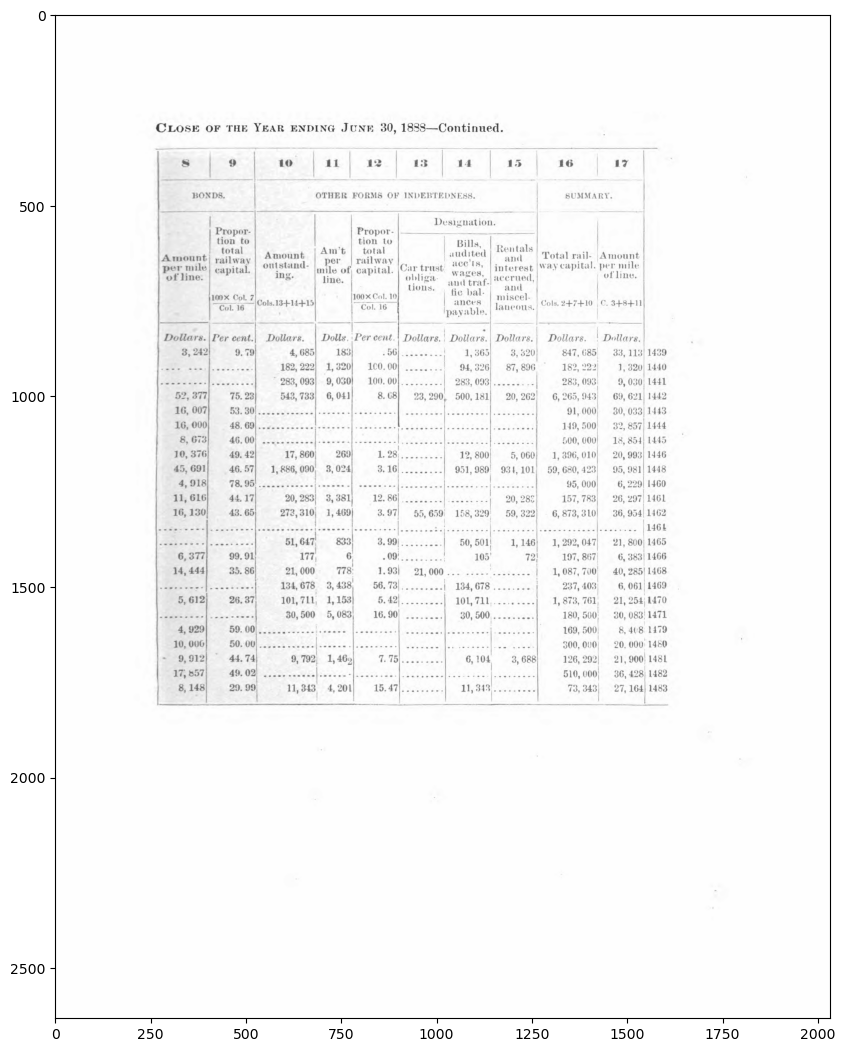

In [4]:
filename = "1888_Page_161.png"
image_path = os.path.join(input_folder, filename)
full_image = cv2.imread(image_path)


#Put modifications to default settings ABOVE here
#Suppose you want to change the side margins to be 8% of the page. 
#Then type: pp.full['left_margin_percent'] = 8
mod_image = pp.draw_margins_splits(full_image, **pp.full);


#If you accept the parameters, save the single image in the output folder
output_path = os.path.join(output_folder, 'processed_' + filename)

try:
    cv2.imwrite(output_path, mod_image)
except:
    pass

# Split image processing

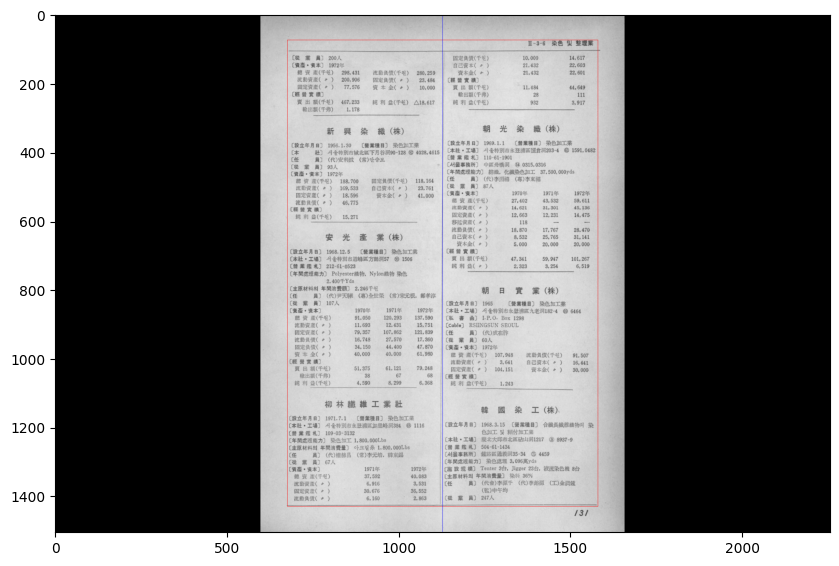

Are you satisfied with the outline you see? (y/n): y
Here is an output based on these parameters


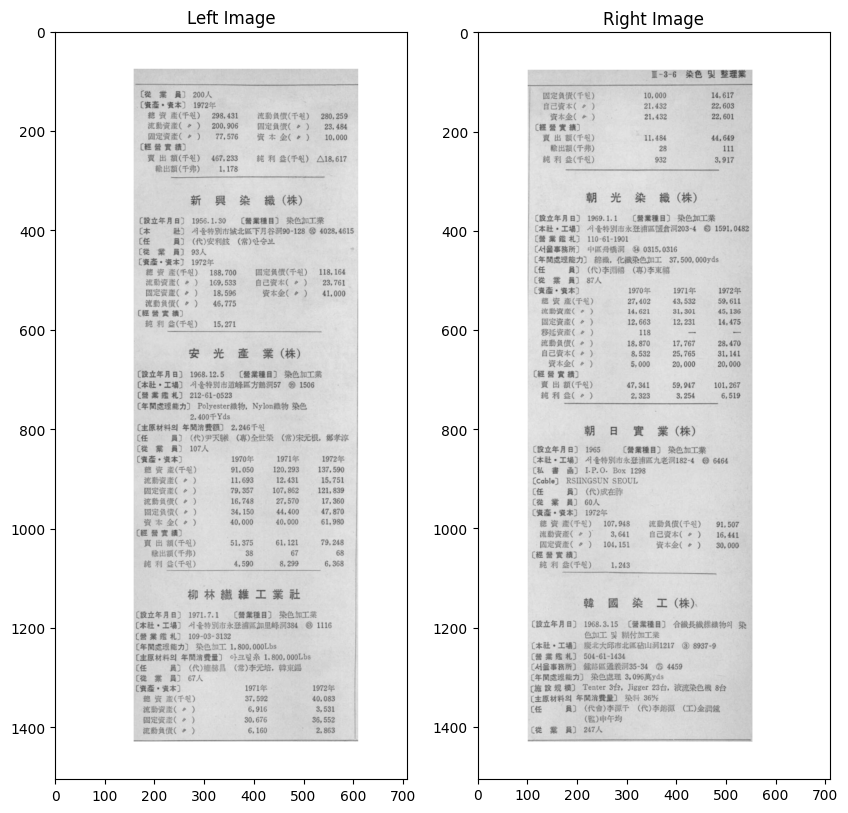

In [4]:
split_filename = "126.png"
image_path = os.path.join(input_folder, split_filename)
full_image = cv2.imread(image_path)


#Put modifications to default settings ABOVE here
#Suppose you want to change the side margins to be 8% of the page. 
#Then type: pp.full['left_margin_percent'] = 8
left_image, right_image = pp.draw_margins_splits(full_image, **pp.vsplit);


#If you accept the parameters, save the split images in the output folder
L_output_path = os.path.join(output_folder, 'processed_L_' + split_filename)
R_output_path = os.path.join(output_folder, 'processed_R_' + split_filename)

try:
    cv2.imwrite(L_output_path, left_image)
    cv2.imwrite(R_output_path, right_image)
except:
    pass

# Send an example image through Textract and/or Cloud Vision

Initialize Textractor client, modify region if required

In [5]:
extractor = Textractor(profile_name="default")

The single US Government image with a single table

In [6]:
# Load the document image with Pillow. This is necessary for Textract to run.
image = Image.open(output_path)

# Analyze the document and specify you want to extract tables
document = extractor.analyze_document(
    file_source=image,
    features=[TextractFeatures.TABLES],
    save_image=True
)

#Show the summary statistics of the detected objects

document

This document holds the following data:
Pages - 1
Words - 388
Lines - 256
Key-values - 0
Checkboxes - 0
Tables - 1
Queries - 0
Signatures - 0
Identity Documents - 0
Expense Documents - 0

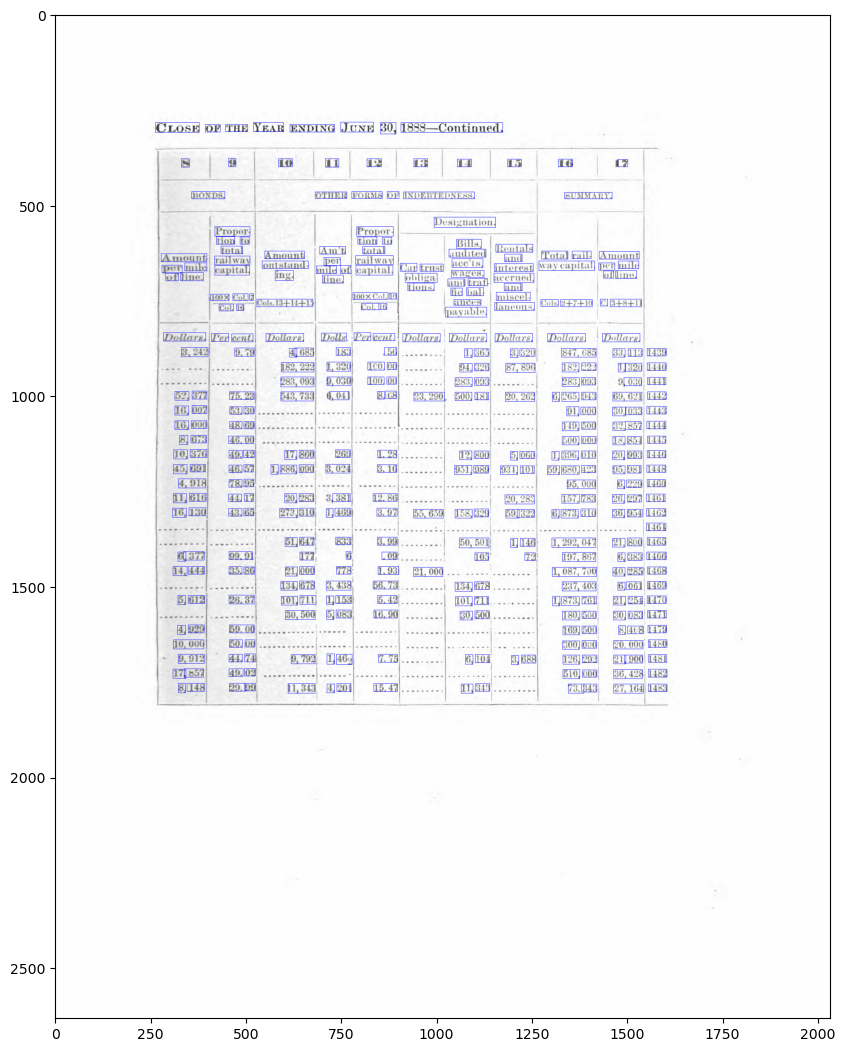

Do you want to see the table output? (y/n): y


0   \
0                          S   
1                     BONDS.   
2                              
3   Amount per mile of line.   
4                   Dollars.   
5                      3,242   
6                              
7                              
8                    52, 377   
9                    16, 007   
10                   16, 000   
11                    8, 673   
12                   10, 376   
13                   45, 691   
14                     4,918   
15                   11, 616   
16                   16, 130   
17                             
18                             
19                   6, ,377   
20                   14, 444   
21                             
22                    5, 612   
23                             
24                    4, 929   
25                    10,000   
26                     9,912   
27                   17, 857   
28                    8, 148   

                                                   1   \
0                                                   9   
1                                                       
2                                             Propor-   
3   tion to total railway capital. 100 X Col. 7 Co...   
4                                           Per cent.   
5                                                9.79   
6                                                       
7                                                       
8                                               75.23   
9                                              53. 30   
10                                             48. 69   
11                                              46.00   
12                                             49. 42   
13                                             46. 57   
14                                             78. 95   
15                                             44. 17   
16                                             43. 65   
17                                                      
18                                                      
19                                              99.91   
20                                             35. 86   
21                                                      
22                                              26.37   
23                                                      
24                                              59.00   
25                                             50. 00   
26                                             44. 74   
27                                             49. 02   
28                                             29. 99   

                                     2                       3   \
0                                    10                      11   
1                                                         OTHER   
2                                                                 
3   Amount outstand- ing. Cols.13-11-15  Am't per mile of line.   
4                              Dollars.                   Dolls   
5                              4, , 685                     183   
6                               182,222                   1,320   
7                               283,093                   9,030   
8                               543,733                   6,041   
9                                                                 
10                                                                
11                                                                
12                              17, 860                     269   
13                          1, 886, 090                   3,024   
14                                                                
15                              20, 283                     381   
16                             273, 310                  1, 469   
17                                                                
18                              51, 647                     833   
19            

In [7]:
#Create a variable for the detected words
words_entity_list = document.words
#Create a variable for the detected tables
table_list = document.tables

#Load the document image with cv2. This is necessary to draw the bounding boxes
sing_image = cv2.imread(output_path)
#Draw the bounding boxes in Textract
pp.textract_boxes(sing_image, words_entity_list, table_list, show_image=True)

Initialize Cloud Vision

In [8]:
#Authenticate Google Cloud

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'ServiceAccountToken.json'
client = vision.ImageAnnotatorClient()

DefaultCredentialsError: File ServiceAccountToken.json was not found.

Run the same image through Cloud Vision

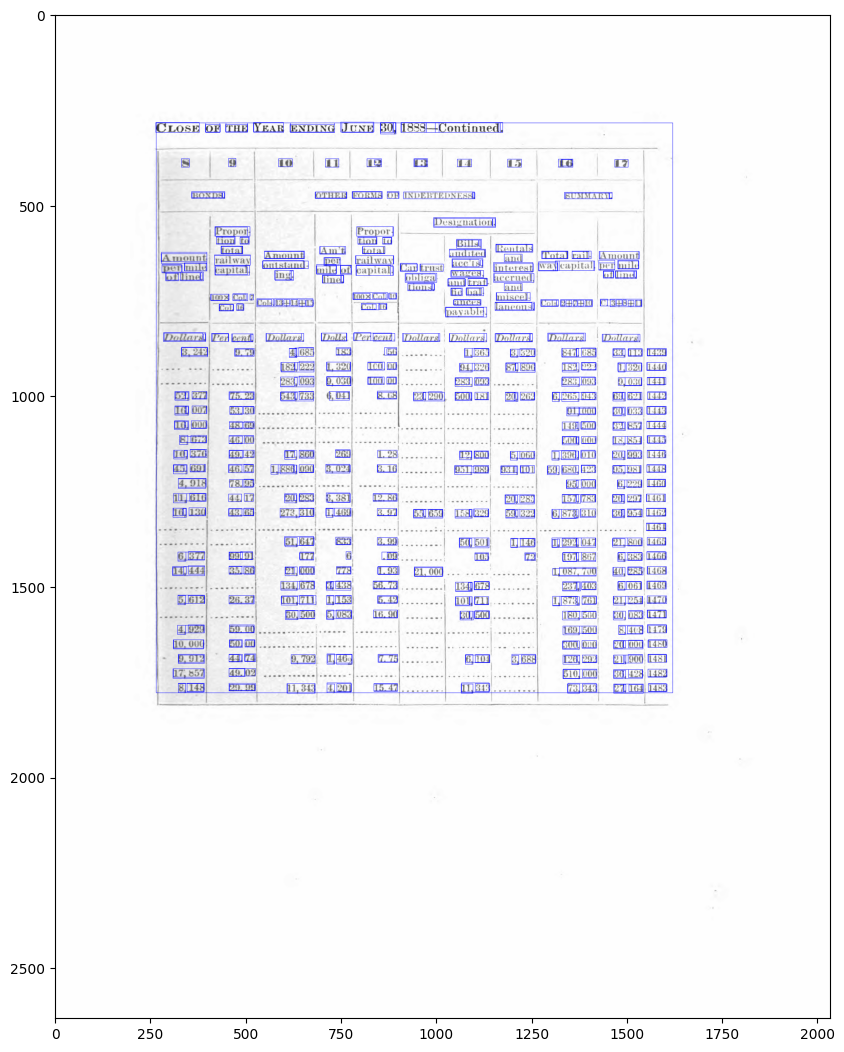

In [9]:
#Define where you want to output the json file
json_output = os.path.join(output_folder, "1888_Page_161.json")

#Run Google Cloud Vision on the single image

pp.gcloud_boxes(sing_image, json_output, show_image=True);

# For another example, use one of the split images from above

In [10]:
# Load the document image with Pillow. This is necessary for Textract to run.
image = Image.open(L_output_path)

# Analyze the document and specify you want to extract tables
document = extractor.analyze_document(
    file_source=image,
    features=[TextractFeatures.TABLES],
    save_image=True
)

#Show the summary statistics of the detected objects

document

This document holds the following data:
Pages - 1
Words - 165
Lines - 103
Key-values - 0
Checkboxes - 0
Tables - 6
Queries - 0
Signatures - 0
Identity Documents - 0
Expense Documents - 0

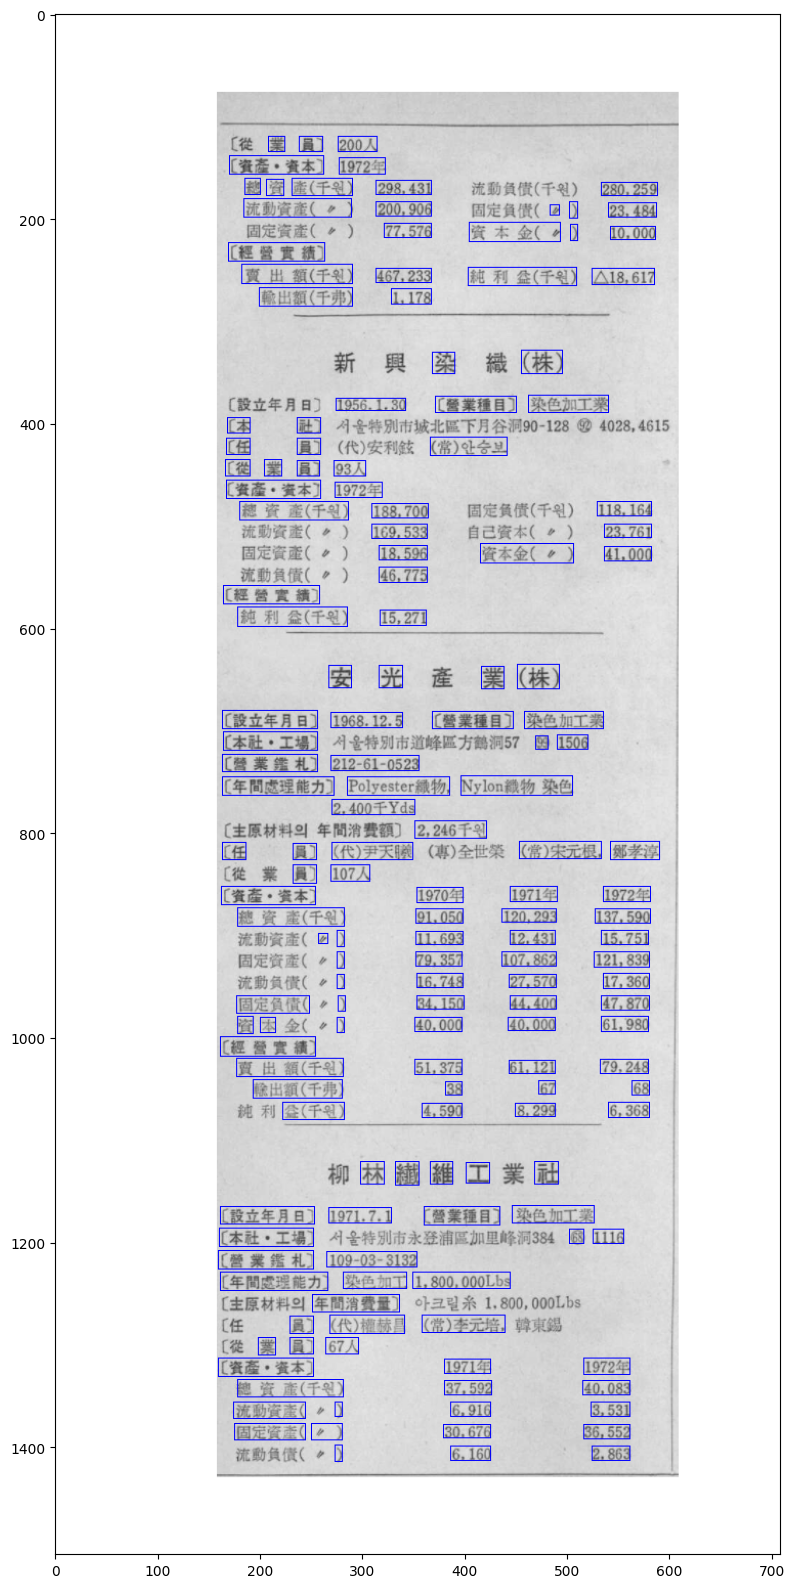

Do you want to see the table output? (y/n): n
no


In [11]:
#Create a variable for the detected words
words_entity_list = document.words
#Create a variable for the detected tables
table_list = document.tables

#Load the document image with cv2. This is necessary to draw the bounding boxes
L_image = cv2.imread(L_output_path)

pp.textract_boxes(L_image, words_entity_list, table_list, show_image=True)

Run the same image through Cloud Vision

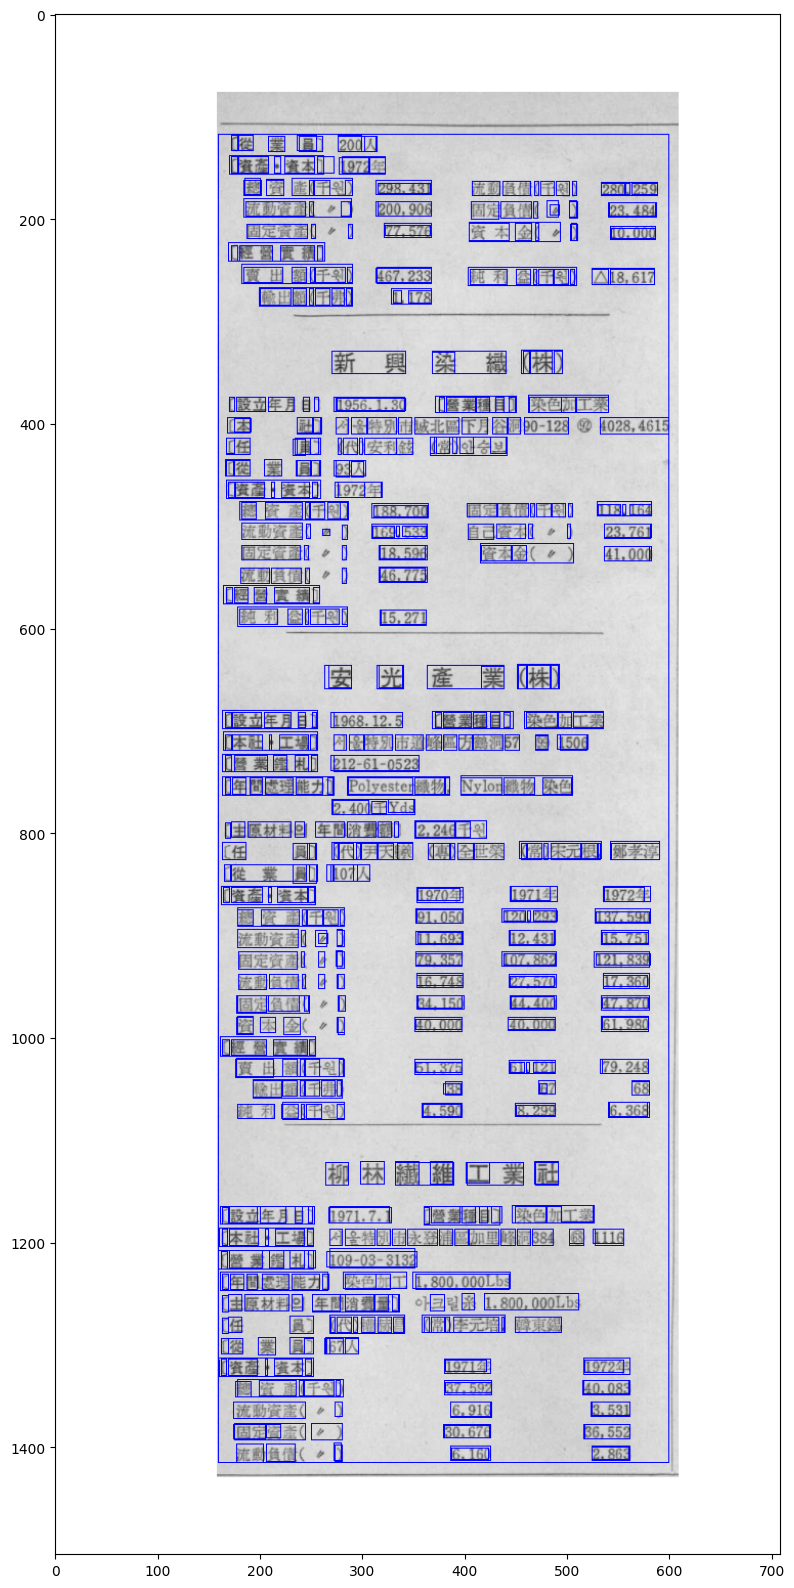

In [12]:
#Define where you want to output the json file
json_output = os.path.join(output_folder, "L_126.json")

#Run Google Cloud Vision on the single image

pp.gcloud_boxes(L_image, json_output, show_image=True);

# There are other features you can exploit as well. See below.

Saving the output of your first detected table to an excel file.

In [13]:
#document.tables[0].to_excel("output.xlsx")

Bypassing the textractor package, obtaining the bounding boxes and raw .json output

In [14]:
#json_output = 'Textractoutput.json'


#pp.Textract_process_image(output_path, json_output)